In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('data.csv')
df.head()

,browser,city,datetime,ip,method,module
0,firefox,倩市,2019-05-21 02:54:01,169.253.193.81,post,任务列表
1,chrome,颖市,2019-05-21 10:33:04,202.112.176.9,post,个人信息
2,firefox,南京市,2019-05-21 10:43:27,192.0.86.164,get,主页
3,firefox,龙县,2019-05-29 03:13:32,192.172.71.27,option,项目列表
4,safari,颖市,2019-05-28 15:22:33,169.242.249.63,post,任务详情


In [16]:
# 数据信息
print(f'数据集一共{len(df)}行数据！各列类型如下(object类型即为string)：')
df.dtypes

数据集一共10000行数据！各列类型如下(object类型即为string)：


browser     object
city        object
datetime    object
ip          object
method      object
module      object
dtype: object

### Q1：一共记录了几天的数据？

In [17]:
t = df.datetime.astype('datetime64[ns]').dt.date.value_counts()
t

2019-05-28    1049
2019-05-27    1040
2019-05-23    1038
2019-05-21    1015
2019-05-22    1005
2019-05-26     999
2019-05-20     966
2019-05-24     956
2019-05-25     947
2019-05-29     874
2019-05-19     111
Name: datetime, dtype: int64

In [18]:
len(t)

11

### Q2：每天请求数是多少，并作折线图展示！

In [19]:
t = df.groupby(df.datetime.astype('datetime64[ns]').dt.date).size()  # 效果类似value_counts()
t

datetime
2019-05-19     111
2019-05-20     966
2019-05-21    1015
2019-05-22    1005
2019-05-23    1038
2019-05-24     956
2019-05-25     947
2019-05-26     999
2019-05-27    1040
2019-05-28    1049
2019-05-29     874
dtype: int64

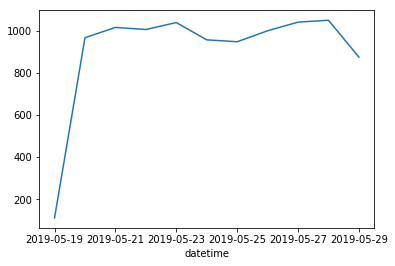

In [20]:
t.plot()

### Q3：访问最多的前五个IP？

In [26]:
df.ip.value_counts().head(5)

203.0.59.155      133
192.83.9.215      128
1.228.115.113     118
192.31.204.69     117
197.154.176.98    116
Name: ip, dtype: int64

### Q4：假如一个ip一个用户，最多用户的前三个城市是那几个？

In [32]:
t = df.groupby('city').ip.unique()
t

city
东莞县      [197.154.176.98, 203.0.59.155, 57.126.171.51, ...
乌鲁木齐县    [216.111.3.86, 192.0.53.46, 203.0.76.165, 203....
伟县       [7.216.233.147, 200.238.69.190, 192.88.57.235,...
倩市       [169.253.193.81, 192.175.169.242, 192.88.156.2...
刚市       [169.201.129.49, 192.52.198.1, 198.50.60.244, ...
利县       [192.91.20.221, 192.91.130.219, 192.52.68.139,...
北京县      [203.6.167.148, 192.31.216.190, 192.52.252.250...
华县       [192.0.11.58, 198.51.232.199, 192.167.183.73, ...
华市       [57.126.171.51, 192.167.183.73, 7.216.233.147,...
南京市      [192.0.86.164, 192.31.197.204, 198.51.108.180,...
天津市      [192.168.121.59, 175.83.83.87, 192.93.129.42, ...
宜都市      [169.255.140.124, 192.197.89.19, 192.31.204.69...
巢湖县      [169.255.215.157, 192.1.229.163, 192.52.252.25...
建军县      [192.174.91.31, 200.65.59.250, 206.107.49.25, ...
想县       [192.88.156.255, 199.190.135.236, 203.0.84.137...
汕尾县      [192.91.130.219, 192.88.66.73, 192.52.143.214,...
潜江县      [192.83.9.215, 57.126.171.51, 192.52.192.2

In [33]:
t.apply(np.alen)

city
东莞县      100
乌鲁木齐县     99
伟县        98
倩市        98
刚市        98
利县       100
北京县       98
华县        99
华市       100
南京市      100
天津市       99
宜都市       98
巢湖县       97
建军县       99
想县       100
汕尾县       99
潜江县       99
玉英县       99
颖市       100
龙县        99
Name: ip, dtype: int64

In [38]:
t.apply(np.alen).sort_values().tail(3)

city
利县     100
想县     100
南京市    100
Name: ip, dtype: int64

### Q5：假如一个ip一个用户，每天的用户数量数多少，折线图展示！

In [22]:
t = df.groupby(df.datetime.astype('datetime64[ns]').dt.date).ip.unique()
t

datetime
2019-05-19    [197.154.176.98, 200.238.69.190, 192.83.9.215,...
2019-05-20    [192.91.130.219, 203.6.167.148, 198.51.101.90,...
2019-05-21    [169.253.193.81, 202.112.176.9, 192.0.86.164, ...
2019-05-22    [192.175.38.219, 192.0.3.183, 192.88.156.255, ...
2019-05-23    [192.31.197.204, 198.50.75.135, 200.65.59.250,...
2019-05-24    [169.255.140.124, 169.242.249.63, 198.51.232.1...
2019-05-25    [197.154.176.98, 192.0.11.58, 192.91.20.221, 1...
2019-05-26    [192.175.169.242, 192.31.216.190, 192.1.229.16...
2019-05-27    [7.216.233.147, 192.83.9.215, 203.0.76.165, 19...
2019-05-28    [169.242.249.63, 57.126.171.51, 198.51.232.199...
2019-05-29    [192.172.71.27, 169.255.215.157, 192.175.58.23...
Name: ip, dtype: object

In [23]:
t.apply(np.alen)

datetime
2019-05-19     65
2019-05-20    100
2019-05-21    100
2019-05-22    100
2019-05-23    100
2019-05-24    100
2019-05-25    100
2019-05-26    100
2019-05-27    100
2019-05-28    100
2019-05-29    100
Name: ip, dtype: int64

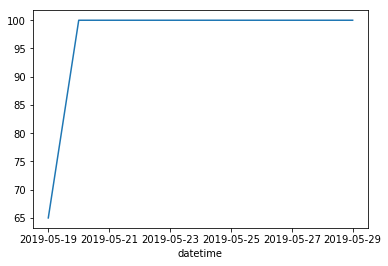

In [24]:
t.apply(np.alen).plot()